# Workshop 5: Accessing data on the web

_BS1819 Data Structures and Algorithms_

_Imperial College Business School_


---
In this workshop we'll practice web scraping and dealing with data from APIs.

---


## Submission

This workshop is meant to be open-ended, and there is no submission. 

## Trump tweets, JSON edition

Earlier in the course, we looked at some of Donald Trump's tweets that had been conveniently packaged into a CSV file that we could open as a spreadsheet. The dataset we used ended in summer 2016. What if we wanted to analyse more recent tweets? We could do this by registering for access to [Twitter's API](https://dev.twitter.com/rest/public) and downloading the data directly using one of the [libraries](https://dev.twitter.com/resources/twitter-libraries) that Python users have developed for accessing the API. 

We won't register for the API today. Instead, we'll use the data maintained by Github user [bpb27](https://github.com/bpb27/trump_tweet_data_archive). 

Let's use Python to download Trump tweets for the entire year 2016.

In [1]:
import requests
import zipfile 
import io

# Github data URL. Option raw=true makes sure we get the data file and not the Github HTML page
tweet_url = 'https://github.com/bpb27/trump_tweet_data_archive/blob/master/condensed_2016.json.zip?raw=true'

# Get zip file
r = requests.get(tweet_url)

# Tell Python to treat downloaded file as zip file -> extract the archive
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

When we get data from the Twitter API, it doesn't come in a spreadsheet format, but as JSON. The above code will have created the JSON file `condensed_2016.json` in your working directory (where this notebook is located).

We could read the JSON file to Python as we would any text file, or open it in Notepad or another text editor. 

In [2]:
json_file_name = 'condensed_2016.json'
with open(json_file_name, encoding='utf8') as f:
    text = f.read()

# Print first characters of resulting string 
print(text[0:500]) 

[{"source": "Twitter for iPhone", "id_str": "815271067749060609", "text": "RT @realDonaldTrump: Happy Birthday @DonaldJTrumpJr!\nhttps://t.co/uRxyCD3hBz", "created_at": "Sat Dec 31 18:59:04 +0000 2016", "retweet_count": 9529, "in_reply_to_user_id_str": null, "favorite_count": 0, "is_retweet": true}, {"source": "Twitter for iPhone", "id_str": "815270850916208644", "text": "Happy Birthday @DonaldJTrumpJr!\nhttps://t.co/uRxyCD3hBz", "created_at": "Sat Dec 31 18:58:12 +0000 2016", "retweet_count": 9


We could parse through the string looking for different aspects of each tweet. But it's much more convenient to use a library that directly exploits the structure of JSON.

In [3]:
import json
json_file_name = 'condensed_2016.json'
with open(json_file_name, encoding='utf8') as f:
        tweet_data = json.load(f)

The result is a Python list of dictionaries containing the tweets.

In [4]:
tweet_data[0:2]

[{'source': 'Twitter for iPhone',
  'id_str': '815271067749060609',
  'text': 'RT @realDonaldTrump: Happy Birthday @DonaldJTrumpJr!\nhttps://t.co/uRxyCD3hBz',
  'created_at': 'Sat Dec 31 18:59:04 +0000 2016',
  'retweet_count': 9529,
  'in_reply_to_user_id_str': None,
  'favorite_count': 0,
  'is_retweet': True},
 {'source': 'Twitter for iPhone',
  'id_str': '815270850916208644',
  'text': 'Happy Birthday @DonaldJTrumpJr!\nhttps://t.co/uRxyCD3hBz',
  'created_at': 'Sat Dec 31 18:58:12 +0000 2016',
  'retweet_count': 9529,
  'in_reply_to_user_id_str': None,
  'favorite_count': 55601,
  'is_retweet': False}]

Now let's study patterns in the data.

### Up all night?

Let's start by analysing President Trump's sleep patterns. Create a count of the number of tweets by hour of the day. You can use `matplotlib` to plot the result. You can do a line chart following [the first example here](https://matplotlib.org/users/pyplot_tutorial.html), or a bar chart following [this example](https://pythonspot.com/en/matplotlib-bar-chart/).

You could also check how this pattern changes over different months.

Here's how you can get the hour from a tweet timestamp using the `datetime` module.

In [5]:
from datetime import datetime

# Get first tweet
tw = tweet_data[0]
print(tw)
# We see the timestamp is at the field 'created_at'

# Get timestamp of the tweet
date_str = tw['created_at']
print(date_str)

# Make into datetime object, get the attributes of the result
dt = datetime.strptime(date_str,'%a %b %d %H:%M:%S +0000 %Y') # specify format of time string
print(dt.year, dt.month, dt.day, dt.hour)
type(dt.hour)

{'source': 'Twitter for iPhone', 'id_str': '815271067749060609', 'text': 'RT @realDonaldTrump: Happy Birthday @DonaldJTrumpJr!\nhttps://t.co/uRxyCD3hBz', 'created_at': 'Sat Dec 31 18:59:04 +0000 2016', 'retweet_count': 9529, 'in_reply_to_user_id_str': None, 'favorite_count': 0, 'is_retweet': True}
Sat Dec 31 18:59:04 +0000 2016
2016 12 31 18


int

Now count all tweets by hour. One way to do this is creating a dictionary with keys as hours and values as counts.

#### Sidebar: dictionary comprehension

Python has a convenient way of reducing the work we need to do for writing loops called _comprehensions_. We can write a loop to create a dictionary in a single line as follows. The same kind of thing can be done to create lists too.

In [6]:
# Initialize dictionary of zero hourly counts using dictionary comprehension
# Dictionary specified as key->hour, value->zero for each hour value in the range
hourly_counts = {hour:0 for hour in range(24)}
hourly_counts

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0}

You may find using this kind of initialization useful in the exercises.

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0}
{0: 196, 1: 287, 2: 301, 3: 204, 4: 110, 5: 68, 6: 32, 7: 10, 8: 2, 9: 23, 10: 97, 11: 189, 12: 225, 13: 271, 14: 231, 15: 205, 16: 239, 17: 188, 18: 215, 19: 217, 20: 219, 21: 263, 22: 231, 23: 202}


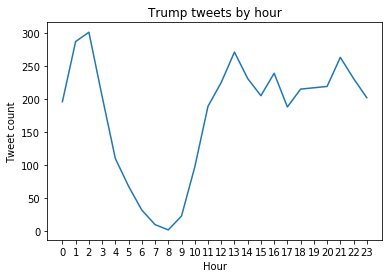

In [8]:
# Initialize dictionary at zero counts using "dictionary comprehension"
hourly_counts = {hour:0 for hour in range(24)}
print(hourly_counts)

for tweet in tweet_data:
    # Your code here
    date_str = tweet['created_at']
    dt = datetime.strptime(date_str,'%a %b %d %H:%M:%S +0000 %Y')
    hourly_counts[dt.hour] += 1
    
print(hourly_counts)


import matplotlib.pyplot as plt
%matplotlib inline 

x_values = list(hourly_counts.keys())
y_values = list(hourly_counts.values())
x_pos = x_values
plt.plot(x_values, y_values)
plt.xticks(x_pos, x_values)
plt.ylabel('Tweet count')
plt.xlabel('Hour')
plt.title('Trump tweets by hour')
plt.show()

### Who's tweeting?

It appears that there are different sources for the tweets in the `source` field of the data. 

Create an hourly count of tweets by the different sources. Can you infer what this suggests about Mr Trump's personal phone and the one his office uses for tweeting?

Let's first find all the sources that are in the data. 

In [9]:
sources = set()
for tweet in tweet_data:
    if tweet['source'] not in sources:
        sources.add(tweet['source'])
        
print(sources)

{'Instagram', 'TweetDeck', 'Twitter for iPhone', 'Media Studio', 'Twitter Web Client', 'Twitter Ads', 'Periscope', 'Mobile Web (M5)', 'Twitter for Android', 'Twitter for iPad'}


Which are the most common sources and what do their timings suggest about usage?

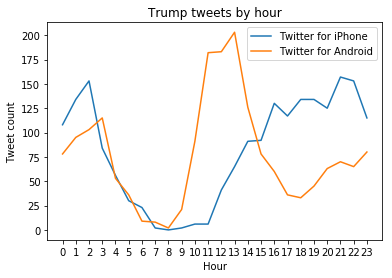

In [10]:
# Your code here

# Initialize a dictionary where each source has a count like above.
tweets_by_source = {src:{hour:0 for hour in range(24)} for src in sources}
tweets_by_source['Twitter for iPhone']


for tweet in tweet_data:
    # Your code here
    src = tweet['source']
    date_str = tweet['created_at']
    dt = datetime.strptime(date_str,'%a %b %d %H:%M:%S +0000 %Y')
    tweets_by_source[src][dt.hour] += 1

sources_to_plot = ['Twitter for iPhone', 'Twitter for Android']
for src in sources_to_plot:
    x_values = list(tweets_by_source[src].keys())
    y_values = list(tweets_by_source[src].values())
    x_pos = x_values

    plt.plot(x_pos, y_values)
    plt.xticks(x_pos, x_values)
    plt.ylabel('Tweet count')
    plt.xlabel('Hour')
    plt.title('Trump tweets by hour')
    plt.legend(sources_to_plot)
 
plt.show()

### Getting personal?

How do the contents of Mr Trump's tweets change depending on the source? We could do some really sophisticated analysis here through [sentiment analysis](http://text-processing.com/demo/sentiment/) of the tweet texts. For the purposes of this exercise, do the following calculations by tweet source:

1. Find the fraction of tweets containing the word 'dumb' in either upper or lower case.

2. Repeat for words you'd like, for example the ones suggested below.

You can also repeat the analysis by source and hour, or look at different words or mentions of different Twitter users. 

Note you probably want to count both upper and lower case words together.


In [11]:
# Your code here
words = ['dumb', 'brexit', '#makeamericagreatagain', 'guns', 'dead', '#crookedhillary']

word_counts = {word:{src:0 for src in sources} for word in words}
tweet_counts = {src:0 for src in sources}


for tweet in tweet_data:
    # Your code here
    src = tweet['source']
    tw_text = tweet['text']
    for word in words:
        if word in tw_text.lower():
            word_counts[word][src] +=1
    tweet_counts[src] +=1

print('"Dumb" fractions')
print({src:word_counts['dumb'][src]/tweet_counts[src] for src in word_counts['dumb']})

"Dumb" fractions
{'Instagram': 0.0, 'TweetDeck': 0.0, 'Twitter for iPhone': 0.0030643513789581204, 'Media Studio': 0.0, 'Twitter Web Client': 0.0029411764705882353, 'Twitter Ads': 0.0, 'Periscope': 0.0, 'Mobile Web (M5)': 0.0, 'Twitter for Android': 0.008174386920980926, 'Twitter for iPad': 0.045454545454545456}


## Accessing the web

The Twitter API provides us with data conveniently in a JSON-structured format, but not all websites have as convenient ways for us to download data. If we still want to extract data from the site, we can access web pages directly using Python. 

When we access a web page directly, we'll replicate in Python what our web browser does when we visit a web page. We contact a website and load the web page, which is typically a HTML file. An HTML file is a text file that includes not only the content of a web page, but also instructions for the browser on how to display the content, for example in paragraphs, tables, bold font, links, and so on. 

When accessing the HTML text file in Python, we'll take advantage of this structure (e.g. identifiers for links) to extract the information we're interested in.

We'll look at the problem of finding a good breakfast in the UK. [This article from the Guardian](https://www.theguardian.com/lifeandstyle/2017/jan/15/50-best-breakfasts-uk) purports to list the 50 best breakfasts in the UK.

The list has interesting information, but in an unstructured form. Suppose we wanted to remember these whenever we're visiting a different city. We might want to store them in a file on our computer or online for easy access. We'll use Python to make this transformation.

### HTML view

The web page lists the restaurants, giving links, locations, and a short description of each. Let's look at how the undrlying HTML file looks like. When viewing a web page in a browser, we can typically do this with the shortcut `Ctrl + U`. This will open the HTML source in a new tab.

The file is huge, with 3000 lines of text. We won't go into details of the HTML here, but instead look for the part in the file where the restaurants are presented. The first restaurant is in "Lewannick", so let's look for that in the source with `Ctrl + F`. We see the following result.

```html
<h2><strong><a href="http://www.coombesheadfarm.co.uk/" data-link-name="in body link" class="u-underline">Coombeshead Farm</a></strong><strong>, Lewannick, Cornwall</strong><br></h2>
<p>It might seem a bit bonkers to include an upmarket B&amp;B (from £90 a night) that doesn’t offer breakfast to non-residents (for the time being), but Coombeshead earns its place here because it does possibly the best breakfast in the UK, and certainly this writer’s favourite of 2016 anywhere.</p>
```
Compare this to the website as it is displayed in your browser and try to link the different parts together.


Let's parse the first restaurant details from the HTML code. Above, the text ", Lewannick, Cornwall" is packaged in between the HTML _tags_ `<strong>` and `</strong>`. The web browser uses HTML tags to display contents in a specific way, here in **bold** font. The tag `<strong>` is the opening tag which starts the emphasized text, and `</strong>` with a slash is the closing tag which ends the emphasis.


Similarly, the text "Coombeshead Farm" is packaged in between the HTML _tags_ `<a>` and `</a>`:
```html
<a href="http://www.coombesheadfarm.co.uk/" data-link-name="in body link" class="u-underline">Coombeshead Farm</a>
```
This is the HTML way of specifying a link to another page. The tag `<a href="http://www.coombesheadfarm.co.uk/">` is the opening tag which creates the link to the restaurant's website. The tag `</a>` closes the tag: in between these, the text "Coombeshead Farm" is what gets displayed on the web page as the link text. Here, the tag has three _attributes_: `href` specifying the link address, and `data-link-name="in body link"` and `class="u-underline"`, which the browser uses to determine how the link is shown.

There are many different HTML tags, which the web browser uses to display contents in a specific way. We will similarly use them to pick the data we'd like from the page.

### Getting the data

We'll use the `requests` library to download the page HTML into Python. The code below fetches the page, and stores the result in `r`, which is a "response" object that the library creates. The object has a `text` attribute, which contains the HTML of the page.

In [12]:
import requests
r = requests.get("https://www.theguardian.com/lifeandstyle/2017/jan/15/50-best-breakfasts-uk")
r.text[:500]

'\n<!DOCTYPE html>\n<html id="js-context" class="js-off is-not-modern id--signed-out" lang="en" data-page-path="/lifeandstyle/2017/jan/15/50-best-breakfasts-uk">\n<head>\n<!--\n     __        __                      _     _      _\n     \\ \\      / /__    __ _ _ __ ___  | |__ (_)_ __(_)_ __   __ _\n      \\ \\ /\\ / / _ \\  / _` | \'__/ _ \\ | \'_ \\| | \'__| | \'_ \\ / _` |\n       \\ V  V /  __/ | (_| | | |  __/ | | | | | |  | | | | | (_| |\n        \\_/\\_/ \\___|  \\__,_|_|  \\___| |_| |_|_|_|  |_|_| |_|\\__, |\n        '

We'll parse the HTML using the `BeautifulSoup 4` library. Let's import it and parse the text. The code below creates a `soup` object that the Beautiful Soup library works with. Similarly to a web browser, Beautiful Soup takes advantage of the tag structure of the web page, not to display it, but to parse for the information that we'd like to store.

In [13]:
from bs4 import BeautifulSoup  
soup = BeautifulSoup(r.text, 'lxml')  

### Collecting restaurants

We'd like to get all 50 restaurants' names, locations, and websites. Let's take another look at the HTML source.

```html
<h2><strong><a href="http://www.coombesheadfarm.co.uk/" data-link-name="in body link" class="u-underline">Coombeshead Farm</a></strong><strong>, Lewannick, Cornwall</strong><br></h2>
<p>It might seem a bit bonkers to include an upmarket B&amp;B (from £90 a night) that doesn’t offer breakfast to non-residents (for the time being), but Coombeshead earns its place here because it does possibly the best breakfast in the UK, and certainly this writer’s favourite of 2016 anywhere.</p>
```

It looks like the structure of the data we'd like is roughly the following.
```html
<h2><strong><a href="WEBPAGE LINK" data-link-name="in body link" class="u-underline">RESTAURANT NAME</a></strong><strong>, LOCATION</strong><br></h2>
```
There's an outer `<h2>` tag which specifies a header, a `<strong>` tag and an `<a>` tag fpr the link and the name, and another `<strong>` tag for the location.

We'd like to pick the three capitalized parts for all restaurants. We can search for tags in Beautiful Soup as follows.

In [14]:
results = soup.find_all('h2') # find all h2 tags
print(results[0:2])

anchor = soup.findAll('h2')[0]

x = anchor.next_sibling
x.next_sibling

[<h2><strong><a class="u-underline" data-link-name="in body link" href="http://www.coombesheadfarm.co.uk/">Coombeshead Farm</a></strong><strong>, Lewannick, Cornwall</strong><br/></h2>, <h2><a class="u-underline" data-link-name="in body link" href="http://cafealfresco.co.uk/page/eat"><strong>Café Alf Resco</strong></a><strong>, Dartmouth, Devon</strong></h2>]


<p>It might seem a bit bonkers to include an upmarket B&amp;B (from £90 a night) that doesn’t offer breakfast to non-residents (for the time being), but Coombeshead earns its place here because it does possibly the best breakfast in the UK, and certainly this writer’s favourite of 2016 anywhere.</p>

Let's see how we can extract the information we want from each restaurant. We can take the first result we found, and apply Beautiful Soup's find method to it again to find (the first) link. The link will have the _attribute_ text and contain the actual link as `link['href']`.

In [15]:
# Find link in first result
link = results[0].find('a') # find link
name = link.text # get text
url = link['href'] # get link address
print(url, name)

# Find the location
location = results[0].find_all('strong')[1].text
location = location[2:] # Get rid of leading comma
print(location)

http://www.coombesheadfarm.co.uk/ Coombeshead Farm
Lewannick, Cornwall


### Scraping is messy

Now try to write a loop that repeats this for all the restaurants. Store the results in a list containing dictionary entries as follows:
```python
[{'Restaurant':name, 'Web page':url, 'Location':location}]
```

At some point you may run into trouble. This is because we have not just picked all restaurants, but other things in the article also have the `<h2>` tag. Some of the results will thus not contain the information we want, and we need to prune them  further. Try to work your loop around this, and other issues you'll run into, to pick the 50 restaurants.

In [16]:
# Your code here
result_list = []

for result in results:
    if not result.find('strong'):
        continue
    link = result.find('a') # find link
    try:
        name = link.text
        url = link['href'] # get link address
    except AttributeError:
        name = result.find('strong').text
        url = ''
    if len(result.find_all('strong')) == 2:
        location = result.find_all('strong')[1].text
    else:
        location = result.find('strong').text
    location = location.lstrip(', ')
    result_list.append({'Restaurant':name,'Web page':url, 'Location':location})

len(result_list)

54

In [17]:
filtered_results = [results[0]]
current = results[0]
while current.next_sibling:
    current = current.next_sibling
    if current.name == 'h2':
        filtered_results.append(current)
len(filtered_results)

for result in filtered_results:
    link = result.find('a') # find link
    try:
        name = link.text
        url = link['href'] # get link address
    except AttributeError:
        name = result.find('strong').text
        url = ''
    if len(result.find_all('strong')) == 2:
        location = result.find_all('strong')[1].text
    else:
        location = result.find('strong').text
    location = location.lstrip(', ')
    result_list.append({'Restaurant':name,'Web page':url, 'Location':location})
    
result_list

[{'Restaurant': 'Coombeshead Farm',
  'Web page': 'http://www.coombesheadfarm.co.uk/',
  'Location': 'Lewannick, Cornwall'},
 {'Restaurant': 'Café Alf Resco',
  'Web page': 'http://cafealfresco.co.uk/page/eat',
  'Location': 'Dartmouth, Devon'},
 {'Restaurant': 'Venus Cafe,',
  'Web page': 'http://www.lovingthebeach.co.uk/blackpool-sands/',
  'Location': 'Blackpool Sands, Devon'},
 {'Restaurant': 'Bakers and Co',
  'Web page': 'http://bakersbristol.co.uk/',
  'Location': 'Bristol'},
 {'Restaurant': 'Cantina',
  'Web page': 'http://cantinaventnor.co.uk/',
  'Location': 'Ventnor, Isle of Wight'},
 {'Restaurant': 'Hart’s Bakery',
  'Web page': 'http://www.hartsbakery.co.uk/',
  'Location': 'Bristol'},
 {'Restaurant': 'The Jericho Cafe',
  'Web page': 'http://www.thejerichocafe.co.uk/',
  'Location': 'Oxford'},
 {'Restaurant': 'Lynwood & Co',
  'Web page': 'https://www.facebook.com/pg/lynwoodandcocafe/about/',
  'Location': 'Lynwood & Co, Lechlade, Gloucestershire'},
 {'Restaurant': 'Saddl

Once you have your results, you can use the following code to write the dictionary into a csv file with the `csv` library.

In [8]:
import csv

# File column names
csv_columns = ['Location','Restaurant','Web page']

with open('best_breakfast_guardian.csv', 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
    writer.writeheader() # header row
    for rest in result_list: # rest of rows
        writer.writerow(rest)

## Scraping the web

As you've seen with the example, web scraping can easily get messy. The less structured the data that we're trying to gather is, the more tricky it is to structure it. In practice, web scraping works best for 
* Structured pages. The page we've just scraped is a text article with some header structure. Scraping data from tables or other more structured forms is often much easier. 
* Static pages. Accessing dynamic content (eg JavaScript) is often impossible through the standard HTML approach we have used. Alternative ways exists, but require more work.

Compared to downloading a file or using an API, web scraping is a fragile way to access a site. The HTML page could be changed, breaking your scraper, whereas APIs are often well maintained and robust. 

You'll have noticed that it would be very easy to crawl through a lot of pages on a site very quickly by looping requests, for example, looking for business analytics positions on an online jobs platform. But note that many websites don't like crawlers: The Guardian's business model, for instance, depends on ad revenues, so they don't like their content being automatically accessed. Here we've downloaded just one page, but if you ran a big scraping operation on them, they might ban you (and your flatmates). They do have an [API](http://open-platform.theguardian.com/access/) for accessing content.

In brief, scraping can be a powerful tool, but if there's an alternative way to get the data you need, don't scrape manually. 

Here are some further resources on scraping:
* [The Beautiful Soup documentation](http://www.crummy.com/software/BeautifulSoup/bs4/doc/) is very well written
* [A success story with scraping](https://www.wired.com/2014/01/how-to-hack-okcupid/all/)
* [A nice and well-documented application on the NY Times website](http://www.dataschool.io/python-web-scraping-of-president-trumps-lies/)
* [Web data collection tasks from Stanford's Computational Journalism lab](https://github.com/stanfordjournalism/search-script-scrape), mostly through various US government APIs